In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from pandas import DataFrame
import seaborn
import glob
import os
import urllib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib import style
import datetime as dt
from dateutil import parser
import json
import requests
%matplotlib inline

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
style.use('fivethirtyeight')
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


In [3]:
print(plt.__file__)

C:\Users\Mark\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\pyplot.py


In [4]:
path_1 = r'C:\Users\Mark\Desktop\Bootcamp\Project One\project_one_forked\Marks_Files\Stock Prices'
all_files_wmt = glob.glob(os.path.join(path_1, 'dji.csv'))

df_from_each_file_wmt = (pd.read_csv(f) for f in all_files_wmt)

concatenated_df_wmt = pd.concat(df_from_each_file_wmt, ignore_index=True)
concatenated_df_wmt.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2-Jan-87,1900.589966,1933.489990,1897.359985,1927.310059,10860000,1927.310059
1,5-Jan-87,1944.880005,1980.739990,1936.589966,1971.319946,25260000,1971.319946
2,6-Jan-87,1978.349976,1993.810059,1961.900024,1974.829956,28560000,1974.829956
3,7-Jan-87,1971.880005,2003.089966,1965.689941,1993.949951,22550000,1993.949951
4,8-Jan-87,1996.770020,2014.199951,1975.959961,2002.250000,25350000,2002.250000


In [5]:
concatenated_df_wmt['Date'] = pd.to_datetime(concatenated_df_wmt['Date'])
concatenated_df_wmt = concatenated_df_wmt.sort_values(by='Date')

In [6]:
hur_kat_df_wmt = concatenated_df_wmt[(concatenated_df_wmt['Date'] > '2005-03-01') & (concatenated_df_wmt['Date'] < '2006-4-01')]
hur_kat_df_wmt.head(10)

,Date,Open,High,Low,Close,Volume,Adj Close
4582,2005-03-02,10825.67969,10869.83008,10774.29004,10811.96973,235950000,10811.96973
4583,2005-03-03,10812.26953,10869.16992,10767.19043,10833.03027,233480000,10833.03027
4584,2005-03-04,10834.50977,10962.41992,10834.29004,10940.54981,240210000,10940.54981
4585,2005-03-07,10940.54981,10984.45996,10931.45996,10936.86035,229120000,10936.86035
4586,2005-03-08,10935.59961,10952.45020,10900.12988,10912.62012,205970000,10912.62012
4587,2005-03-09,10912.32031,10923.17969,10802.05957,10805.62012,267970000,10805.62012
4588,2005-03-10,10806.28027,10875.51953,10780.34961,10851.50977,224040000,10851.50977
4589,2005-03-11,10845.29981,10872.34961,10758.54981,10774.36035,243050000,10774.36035
4590,2005-03-14,10773.91992,10805.46973,10754.41016,10804.50977,237050000,10804.50977
4591,2005-03-15,10804.29004,10838.65039,10745.09961,10745.09961,237710000,10745.09961


In [7]:
MA1 = 10
MA2 = 30
MA3 = 200

def moving_average(values, window):
    weights = np.repeat(1.0, window)/window
    smas = np.convolve(values, weights, 'valid')
    return smas

In [8]:
def high_minus_low(highs, lows):
    return highs-lows

In [9]:
def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter

In [10]:
def graph_data(stock):

    fig = plt.figure(facecolor='#f0f0f0')
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=1, colspan=1)
    plt.title(stock)
    plt.ylabel('H-L')
    
    ax2 = plt.subplot2grid((6,1), (1,0), rowspan=4, colspan=1, sharex=ax1)
    plt.ylabel('Price')
    ax2v = ax2.twinx()
    
    ax3 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
    plt.ylabel('MAvgs')

In [11]:
date = hur_kat_df_wmt['Date'].tolist()
closep = hur_kat_df_wmt['Close'].tolist()
highp = hur_kat_df_wmt['High'].tolist()
lowp = hur_kat_df_wmt['Low'].tolist()
openp = hur_kat_df_wmt['Open'].tolist()
volume = hur_kat_df_wmt['Volume'].tolist()

In [12]:
    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1
    
    #months = np.arange(0,13,1)    
    ma1 = moving_average(closep,MA1)
    ma2 = moving_average(closep,MA2)
    price = closep
    start = len(date[MA2-1:])
    
    h_l = list(map(high_minus_low, highp, lowp))
        

In [13]:
#ma1 = np.insert(ma1, 0, [0,0,0,0,0,0,0,0,0], axis=0)
short_date = date[9:]
short_date_2 = date[29:]
short_date_3 = date[199:]

In [18]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax.annotate('AUG29, 2005: Hurricane Katrina', xy=('2005-08-29', 49.80), xytext=('2005-10-02', 52.00),
            arrowprops=dict(facecolor='blue', shrink=0.5),)

MA_10, = plt.plot(short_date, ma1, color="red", label="MA_10")
MA_30, = plt.plot(short_date_2, ma2, color="green", label="MA_30")
Price, = plt.plot(date, price, color="blue", label="Price")

plt.title("Walmart Stock Analysis: Hurricane Katrina")
plt.xlabel("Date")
plt.ylabel("(Red) = 10-day, (Green) = 30-day, (Blue) = Price)")


Text(0,0.5,'(Red) = 10-day, (Green) = 30-day, (Blue) = Price)')

ValueError: Image size of 732460x542 pixels is too large. It must be less than 2^16 in each direction.

In [15]:
path_2 = r'C:\Users\Komron\Documents\PythonData\project_one\HD'
all_files_hd = glob.glob(os.path.join(path_2, '*.csv'))

df_from_each_file_hd = (pd.read_csv(f) for f in all_files_hd)

concatenated_df_hd = pd.concat(df_from_each_file_hd, ignore_index=True)
concatenated_df_hd.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2-Jan-87,0.395062,0.397805,0.392318,0.395062,2745300,0.267824
1,5-Jan-87,0.406036,0.425240,0.406036,0.422497,2941200,0.286423
2,6-Jan-87,0.422497,0.422497,0.414266,0.417010,3601800,0.282703
3,7-Jan-87,0.419753,0.441701,0.419753,0.441701,5888100,0.299442
4,8-Jan-87,0.438957,0.438957,0.425240,0.430727,1531800,0.292002


In [16]:
concatenated_df_hd['Date'] = pd.to_datetime(concatenated_df_hd['Date'])
concatenated_df_hd = concatenated_df_hd.sort_values(by='Date')

In [17]:
hur_kat_df_hd = concatenated_df_hd[(concatenated_df_hd['Date'] > '2005-03-01') & (concatenated_df_hd['Date'] < '2006-4-01')]
hur_kat_df_hd.head(10)

,Date,Open,High,Low,Close,Volume,Adj Close
4582,2005-03-02,39.849998,40.189999,39.779999,39.980000,7257100,29.150328
4583,2005-03-03,39.990002,40.150002,39.700001,39.720001,6993800,28.960772
4584,2005-03-04,39.950001,40.150002,39.700001,40.090000,5639700,29.230536
4585,2005-03-07,40.009998,40.270000,39.790001,39.880001,6808200,29.077419
4586,2005-03-08,39.950001,40.139999,39.849998,39.970001,5578000,29.216303
4587,2005-03-09,39.840000,39.900002,39.480000,39.490002,7951000,28.865456
4588,2005-03-10,39.410000,39.889999,39.410000,39.889999,5574900,29.157827
4589,2005-03-11,39.799999,40.000000,39.360001,39.419998,5837300,28.814283
4590,2005-03-14,39.599998,39.669998,38.759998,39.470001,8673000,28.850830
4591,2005-03-15,39.650002,39.990002,39.549999,39.759998,7213700,29.062807


In [18]:
date = hur_kat_df_hd['Date'].tolist()
closep = hur_kat_df_hd['Close'].tolist()
highp = hur_kat_df_hd['High'].tolist()
lowp = hur_kat_df_hd['Low'].tolist()
openp = hur_kat_df_hd['Open'].tolist()
volume = hur_kat_df_hd['Volume'].tolist()

Text(0,0.5,'(Red) = 10-day, (Green) = 30-day, (Blue) = Price)')

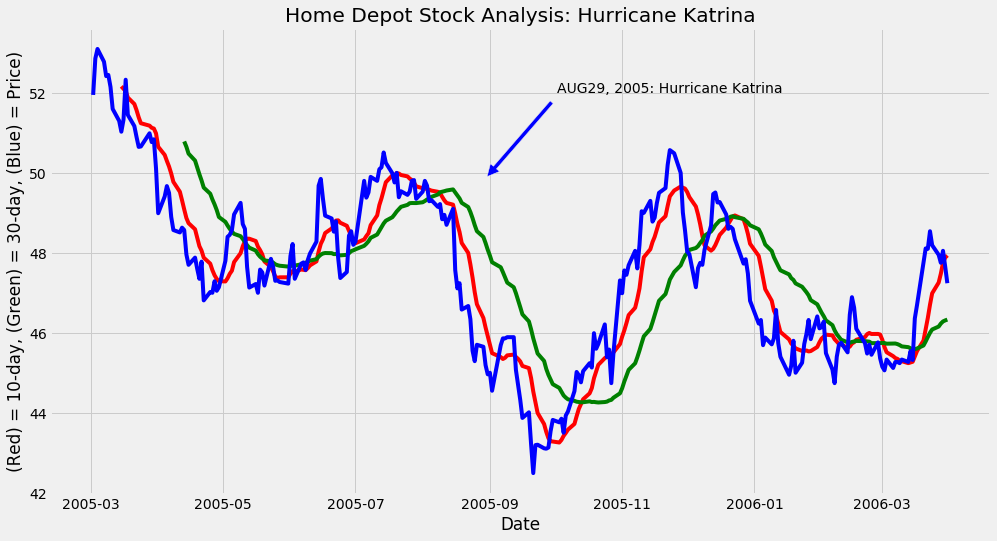

In [19]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax.annotate('AUG29, 2005: Hurricane Katrina', xy=('2005-08-29', 49.80), xytext=('2005-10-02', 52.00),
            arrowprops=dict(facecolor='blue', shrink=0.05),)

MA_10, = plt.plot(short_date, ma1, color="red", label="MA_10")
MA_30, = plt.plot(short_date_2, ma2, color="green", label="MA_30")
Price, = plt.plot(date, price, color="blue", label="Price")

plt.title("Home Depot Stock Analysis: Hurricane Katrina")
plt.xlabel("Date")
plt.ylabel("(Red) = 10-day, (Green) = 30-day, (Blue) = Price)")

In [20]:
closep_wmt = hur_kat_df_wmt['Close'].tolist()
closep_hd = hur_kat_df_hd['Close'].tolist()
ma3_wmt = moving_average(closep_wmt,MA3)
ma3_hd = moving_average(closep_hd,MA3)

Text(0,0.5,'(Red) = Walmart, (Green) = Home Depot')

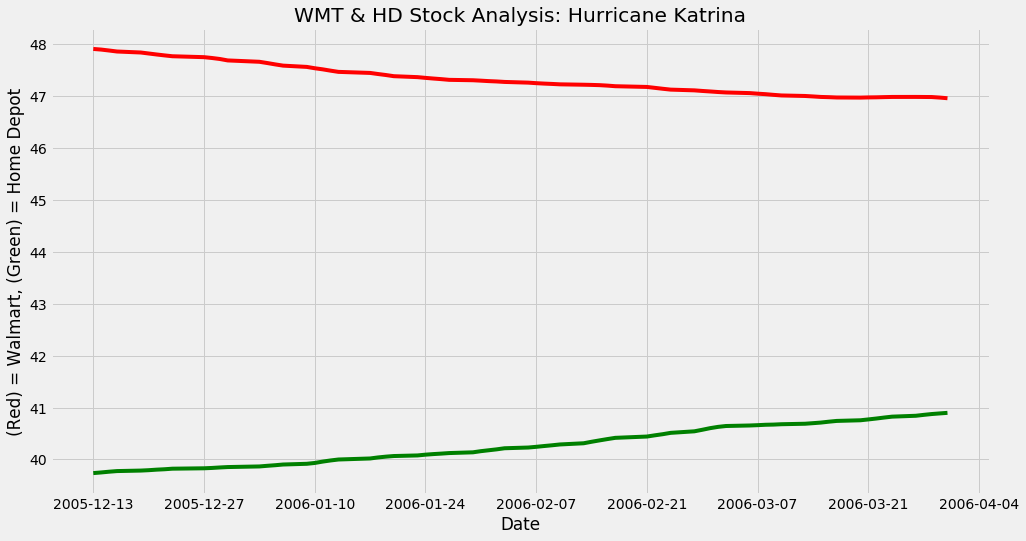

In [21]:
plt.figure(figsize=(15,8))

WMT_MA50, = plt.plot(short_date_3, ma3_wmt, color="red", label="WMT")
HD_MA50, = plt.plot(short_date_3, ma3_hd, color="green", label="HD")

plt.title("WMT & HD Stock Analysis: Hurricane Katrina")
plt.xlabel("Date")
plt.ylabel("(Red) = Walmart, (Green) = Home Depot")

In [22]:
url = "https://api.nytimes.com/svc/search/v2/articlesearch.json?"
api_key = "164b73c522a8420c8e05343ef1da0a7e"

In [23]:
# Search for articles that mention "Hurricane Katrina"
q = "Hurricane Katrina"
begin_date = '20050823'
end_date = '20060401'

In [24]:
query = url + "api-key=" + api_key + "&q=" + q +'&begin_date=' + begin_date + '&end_date=' + end_date
print(query)

https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key=164b73c522a8420c8e05343ef1da0a7e&q=Hurricane Katrina&begin_date=20050823&end_date=20060401


In [25]:
articles = requests.get(query).json()

In [26]:
print(json.dumps(articles, indent=4, sort_keys=True))

{
    "copyright": "Copyright (c) 2018 The New York Times Company. All Rights Reserved.",
    "response": {
        "docs": [
            {
                "_id": "4fd24e268eb7c8105d7efadc",
                "abstract": "Family whose apartment in New Orleans was destroyed by fire after Hurricane Katrina has stayed in 14 different places since then, including five shelters; immediate aftermath of hurricane has exposed deep divide between New Orleans's haves and have-nots; middle-class families rushed to hotels while poorest of poor suffered in squalor of Superdome; chasm remains, three months later; Tracy Jackson and Jerel Brown, who are not married and lack high school diplomas, credit cards or driver's licenses, are, with their four young children, among legions of desperately destitute still lost and in limbo; their troubled, directionless odyssey is one of opportunities missed and squandered, of government money and charitable donations spent partly on DVD's and costume jewelry, of f

In [27]:
with open('nyt.json', 'w') as outfile:
    json.dump(articles, outfile, indent=4, sort_keys=True)

In [28]:
for article in articles["response"]["docs"]:
    print(article)

{'web_url': 'https://www.nytimes.com/2005/12/13/national/nationalspecial/13katrina.html', 'snippet': 'More than three months after Hurricane Katrina uprooted thousands of lives, many of the poorest victims remain in limbo.', 'abstract': "Family whose apartment in New Orleans was destroyed by fire after Hurricane Katrina has stayed in 14 different places since then, including five shelters; immediate aftermath of hurricane has exposed deep divide between New Orleans's haves and have-nots; middle-class families rushed to hotels while poorest of poor suffered in squalor of Superdome; chasm remains, three months later; Tracy Jackson and Jerel Brown, who are not married and lack high school diplomas, credit cards or driver's licenses, are, with their four young children, among legions of desperately destitute still lost and in limbo; their troubled, directionless odyssey is one of opportunities missed and squandered, of government money and charitable donations spent partly on DVD's and cos

In [29]:
article_list = [article for article in articles["response"]["docs"]]

In [30]:
article_list

[{'_id': '4fd24e268eb7c8105d7efadc',
  'abstract': "Family whose apartment in New Orleans was destroyed by fire after Hurricane Katrina has stayed in 14 different places since then, including five shelters; immediate aftermath of hurricane has exposed deep divide between New Orleans's haves and have-nots; middle-class families rushed to hotels while poorest of poor suffered in squalor of Superdome; chasm remains, three months later; Tracy Jackson and Jerel Brown, who are not married and lack high school diplomas, credit cards or driver's licenses, are, with their four young children, among legions of desperately destitute still lost and in limbo; their troubled, directionless odyssey is one of opportunities missed and squandered, of government money and charitable donations spent partly on DVD's and costume jewelry, of fumbling to find family without phone numbers, of many days doing little more than waiting for help to somehow happen; they are now camped in rundown section of Baton Ro

In [43]:
abstracts = []
for article in article_list:
    abstracts.append(article.get('abstract'))

print(abstracts)

["Family whose apartment in New Orleans was destroyed by fire after Hurricane Katrina has stayed in 14 different places since then, including five shelters; immediate aftermath of hurricane has exposed deep divide between New Orleans's haves and have-nots; middle-class families rushed to hotels while poorest of poor suffered in squalor of Superdome; chasm remains, three months later; Tracy Jackson and Jerel Brown, who are not married and lack high school diplomas, credit cards or driver's licenses, are, with their four young children, among legions of desperately destitute still lost and in limbo; their troubled, directionless odyssey is one of opportunities missed and squandered, of government money and charitable donations spent partly on DVD's and costume jewelry, of fumbling to find family without phone numbers, of many days doing little more than waiting for help to somehow happen; they are now camped in rundown section of Baton Rouge, sharing house with Jackson's sister and her f

In [31]:
snippets = []
for article in article_list:
    snippets.append(article.get('snippet'))
    print(snippets)

['More than three months after Hurricane Katrina uprooted thousands of lives, many of the poorest victims remain in limbo.']
['More than three months after Hurricane Katrina uprooted thousands of lives, many of the poorest victims remain in limbo.', 'The National Football League is determined to make the New Orleans Saints feel as if they are playing a home game Monday night, even though Giants Stadium sits almost 1,200 miles northeast of the Louisiana Superdome and is just another way station...']
['More than three months after Hurricane Katrina uprooted thousands of lives, many of the poorest victims remain in limbo.', 'The National Football League is determined to make the New Orleans Saints feel as if they are playing a home game Monday night, even though Giants Stadium sits almost 1,200 miles northeast of the Louisiana Superdome and is just another way station...', 'ON the afternoon before Hurricane Katrina hit, as he was packing his car to flee, Lawrence Winchester called Prof.']

In [34]:
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

In [45]:
analyzer = SentimentIntensityAnalyzer()

In [53]:
compound = analyzer.polarity_scores(abstracts[0])["compound"]
pos = analyzer.polarity_scores(abstracts[0])["pos"]
neg = analyzer.polarity_scores(abstracts[0])["neg"]
neu = analyzer.polarity_scores(abstracts[0])["neu"]

compound_list.append(compound)
positive_list.append(pos)
neutral_list.append(neu)
negative_list.append(neg)

print(f"Source: {url}")
print(f"Compound: {np.mean(compound_list)}")
print(f"Positive: {np.mean(positive_list)}")
print(f"Neutral: {np.mean(neutral_list)}")
print(f"Negative: {np.mean(negative_list)}")

Source: https://api.nytimes.com/svc/search/v2/articlesearch.json?
Compound: -0.887
Positive: 0.083
Neutral: 0.772
Negative: 0.145


In [54]:
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

In [56]:
compound = analyzer.polarity_scores(snippets[0])["compound"]
pos = analyzer.polarity_scores(snippets[0])["pos"]
neg = analyzer.polarity_scores(snippets[0])["neg"]
neu = analyzer.polarity_scores(snippets[0])["neu"]

compound_list.append(compound)
positive_list.append(pos)
neutral_list.append(neu)
negative_list.append(neg)

print(f"Source: {url}")
print(f"Compound: {np.mean(compound_list)}")
print(f"Positive: {np.mean(positive_list)}")
print(f"Neutral: {np.mean(neutral_list)}")
print(f"Negative: {np.mean(negative_list)}")

Source: https://api.nytimes.com/svc/search/v2/articlesearch.json?
Compound: -0.79365
Positive: 0.0415
Neutral: 0.759
Negative: 0.1995
